# Clasificación - Predicción de sobrevivientes

In [1]:
#Carga de las librerías
#import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score , precision_score , classification_report,confusion_matrix, recall_score, f1_score
from sklearn import tree

In [2]:
#Ahora si cargamos los datos en jupyter!
data = pd.read_csv("titanic.csv")
data1 = data.copy()
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## EDA 

In [3]:
#Analicemos brevemente el dataset
data1.shape

(891, 15)

In [4]:
data1.isna().sum() # verifico valores nulos 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Check for duplicate rows and delete
data1.duplicated().sum()

107

In [6]:
data1['survived'].value_counts() # Analizo la variable target

0    549
1    342
Name: survived, dtype: int64

In [7]:
data1['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [8]:

data1 = data.drop('alive', axis = 1) # elimino la variable ya que se repite con la variable target

In [9]:
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


In [10]:
data1. describe() # estadísticos 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Análisis de variables independientes

In [11]:
data1['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [12]:
data1['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [13]:
data1['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [14]:
data1 = data1.drop ('who', axis =1) # ELIMINO VARIABLE WHO YA QUE ES IGUAL A LA VARIABLE SEX

In [15]:
data1 = data1.drop('adult_male', axis = 1) # ELIMINO VARIABLE WHO YA QUE SE SUPERPONE A LA VARIABLE SEX

In [16]:
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,True


In [17]:
data1['class'].value_counts() 

Third     491
First     216
Second    184
Name: class, dtype: int64

In [18]:
data1['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [19]:
data1 = data1.drop ('class', axis =1) # ELIMINO CLASS YA QUE ES IGUAL A LA VARIABLES PCLASS

In [20]:
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,C,Cherbourg,True


In [21]:
data1['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [22]:
data1['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [23]:
data1['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [24]:
data1['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [25]:
data1 = data1.drop ('embark_town', axis =1) # elimino la variable ya que se repite con la variable embarked

In [26]:
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,True
887,1,1,female,19.0,0,0,30.0000,S,B,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,C,True


In [27]:
data1['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

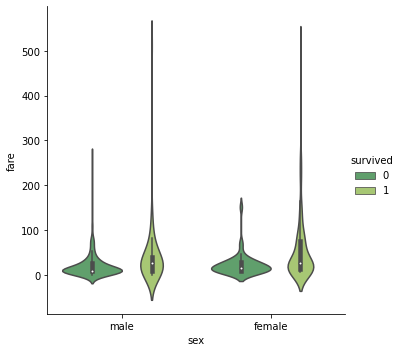

In [28]:
sns.catplot(x ='sex',y = 'fare', split = False, hue = 'survived', data=data1, kind='violin', palette='summer')

In [29]:
data1.loc[(data1['deck'].isnull ()== True), 'deck'] = 1
data1.loc[(data1['deck'] == 1), 'deck'] =0 

In [30]:
data1= pd.get_dummies(data1, columns = ['deck'], drop_first=True) # reazo dummies de la variable deck

In [31]:
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,male,22.0,1,0,7.2500,S,False,0,0,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,False,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,True,0,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,False,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,True,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True,0,0,0,0,0,0,0
887,1,1,female,19.0,0,0,30.0000,S,True,0,1,0,0,0,0,0
888,0,3,female,NaN,1,2,23.4500,S,False,0,0,0,0,0,0,0
889,1,1,male,26.0,0,0,30.0000,C,True,0,0,1,0,0,0,0


In [32]:
data1['embarked'].isna().sum()

2

In [33]:
data1['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [34]:
data1.loc[(data1['embarked'].isnull ()== True), 'embarked'] = 'S' #relleno valores nulos con la moda

In [35]:
data1['embarked'].isna().sum()

0

In [36]:
data1= pd.get_dummies(data1, columns = ['sex'], drop_first=True) # dummies en la variable sex

In [37]:
data1

,survived,pclass,age,sibsp,parch,fare,embarked,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male
0,0,3,22.0,1,0,7.2500,S,False,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,False,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,True,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,S,False,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,S,True,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True,0,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,S,True,0,1,0,0,0,0,0,0
888,0,3,NaN,1,2,23.4500,S,False,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,C,True,0,0,1,0,0,0,0,1


In [38]:
data1= pd.get_dummies(data1, columns = ['alone'], drop_first=True) # dummies en la variable alone

In [39]:
data1

,survived,pclass,age,sibsp,parch,fare,embarked,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male,alone_True
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,0,0,0,0,0,0,1,1
887,1,1,19.0,0,0,30.0000,S,0,1,0,0,0,0,0,0,1
888,0,3,NaN,1,2,23.4500,S,0,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,C,0,0,1,0,0,0,0,1,1


<AxesSubplot:>

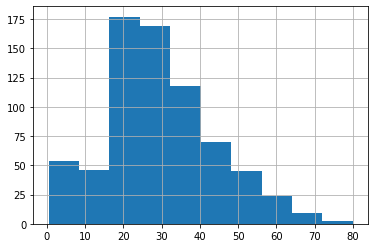

In [40]:
data1['age'].hist()

C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

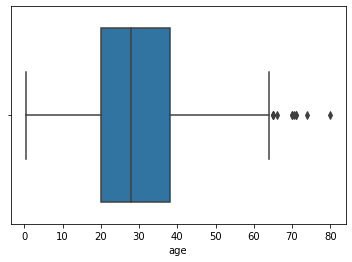

In [41]:
sns.boxplot(data['age']) # hay outlieres

In [42]:
data1.loc[(data1['age'].isnull ()== True), 'age'] = data1['age'].median() # relleno los valres nulos con la mediana

In [43]:
data1.isna().sum() # no hay valores nulos

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck_A        0
deck_B        0
deck_C        0
deck_D        0
deck_E        0
deck_F        0
deck_G        0
sex_male      0
alone_True    0
dtype: int64

In [44]:
data1= pd.get_dummies(data1, columns = ['embarked'], drop_first=True) # dummies a la variable

## Matriz de gráficos

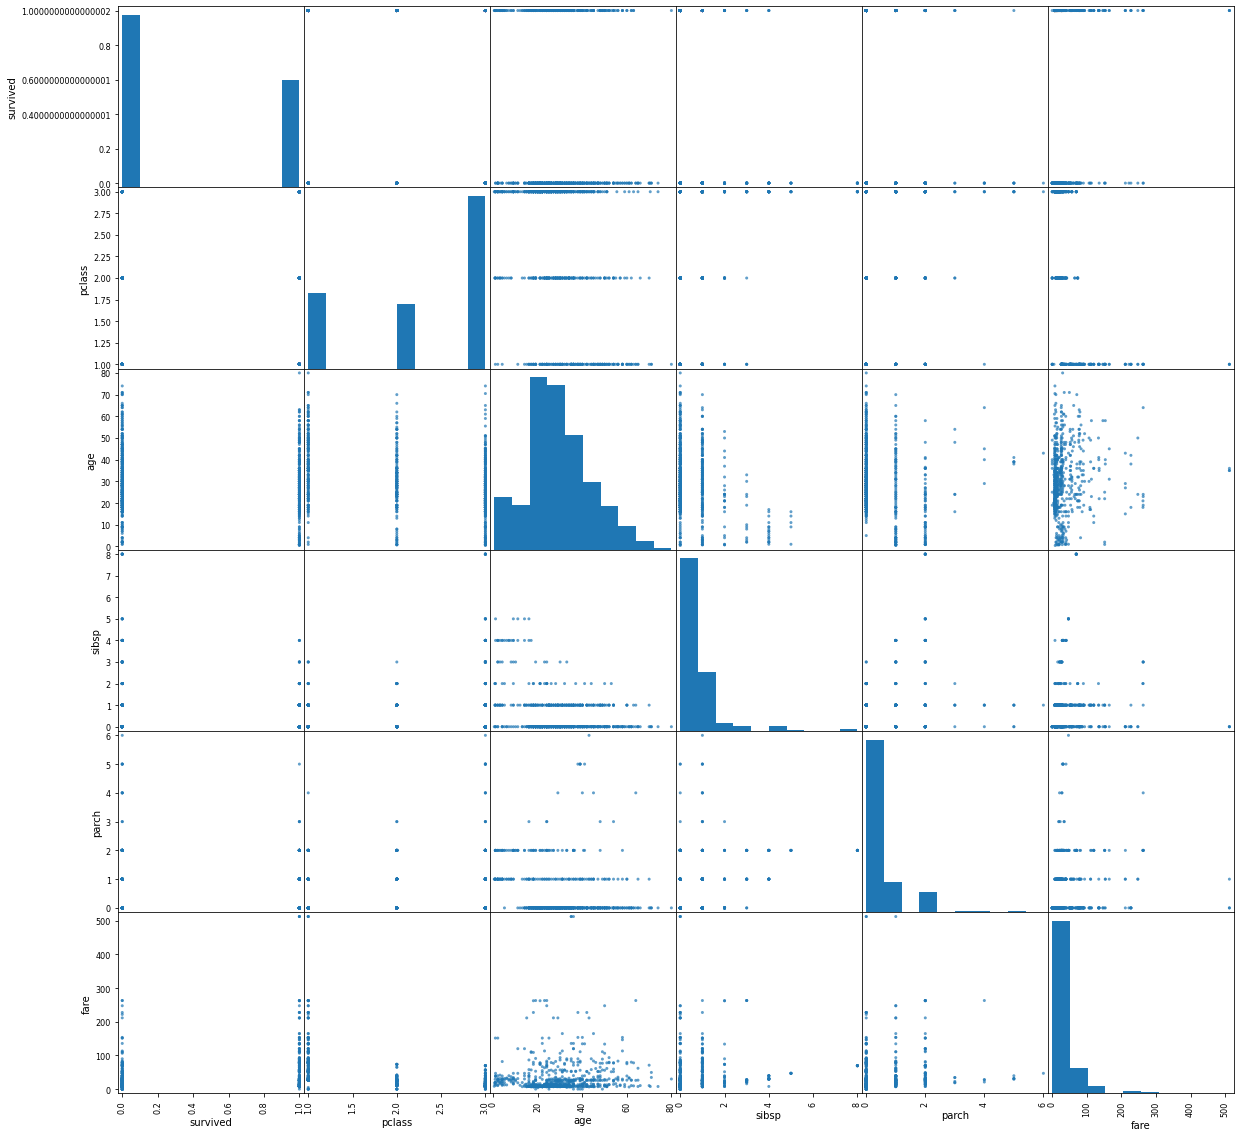

In [45]:
_=pd.plotting.scatter_matrix(data.iloc[:,0:7],figsize=(20, 20), alpha=0.7) 


## Matriz de Correlación

In [46]:
corr_matrix = data3.corr()
plt.figure(figsize=(8,8))
plt.imshow(corr_matrix, cmap='jet')

# Set ticks en X, Y las columnas del dataframe
#np.arange(12) representan las 12 columnas
xt = plt.xticks(np.arange(16), data3.columns, rotation=45, ha='right')
yt = plt.yticks(np.arange(16), data3.columns, rotation=0)

# Set colorbar
plt.colorbar(label='Pearson CC')

NameError: name 'data3' is not defined

In [ ]:
data1 = data1.drop('deck_A', axis =1) # elimino las variables que no correlacionan
data1 = data1.drop('deck_B', axis =1)
data1 = data1.drop('deck_C', axis =1)
data1 = data1.drop('deck_D', axis =1)
data1 = data1.drop('deck_E', axis =1)
data1 = data1.drop('deck_F', axis =1)
data1 = data1.drop('deck_G', axis =1)

**Insights**:

* El dataset se compone de 10 columnas de las cuales 9 corresponden a variables independientes, que usaremos para predecir el target. 

* Classification es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

## Entrenamiento y Testeo

In [ ]:
titanic =data1.copy()

In [ ]:
titanic

In [ ]:
#Separamos en X e y
X = titanic.drop(["survived"], axis=1)
y = data["survived"]

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.20,
                                    random_state=42)

In [ ]:
#Creamos un arbol de decisión sencillo y lo fiteamos
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC


tree1 = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state = 42)
tree1.fit(X_train, y_train)

In [ ]:
y_train_pred = tree1.predict(X_train)

In [ ]:
y_test_pred = tree1.predict(X_test) #Prediccion en Test

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)


In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)



In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Creamos un random forest! con RandomizedSearchCV

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distribs = {'n_estimators': randint (low = 1, high =200),
              'max_depth': randint (low =2, high =4),
              }

random = RandomForestClassifier()
#Utilizamos la grilla definida anteriormente...
model = RandomizedSearchCV(random, param_distributions=param_distribs, cv=2)
model.fit(X_train, y_train)


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) #Prediccion en Test




In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor estimador: "+str(model.best_estimator_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# BAYES

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_train_pred = tree1.predict(X_train)
confusion_matrix(y_train, y_train_pred)

In [ ]:
y_test_pred = tree1.predict(X_test) #Prediccion en Test
confusion_matrix(y_test, y_test_pred)

In [ ]:
gnb.predict_proba(X_test) # Probabilidades


In [ ]:
y_test_pred

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Creamos un KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)


In [ ]:
y_train_pred = knn.predict(X_train)
confusion_matrix(y_train, y_train_pred)

In [ ]:
y_test_pred = knn.predict(X_test) #Prediccion en Test
confusion_matrix(y_test, y_test_pred)

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Creamos KNN con GridSearch CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



param_grid = {'n_neighbors':[8,15,20],
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,6,9],
              'algorithm':['auto', 'kd_tree']}

knn = KNeighborsClassifier()
#Utilizamos la grilla definida anteriormente...

model = GridSearchCV(knn, param_grid=param_grid, cv=10)

In [ ]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test) 

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor estimador: "+str(model.best_estimator_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores